# What behaviors are associated with learning in Interactive Radio Instruction?   

This is analysis seeks to perform a correlation analysis to identify what learner behavior may be associated with measures of learning e.g earning a certificate of completion.

In [180]:
#constants
COURSE_INFO = {
    4: {
        "BROADCAST_START":"10:00",
        "BROADCAST_END":"10:30",
        "EXAM_KEY_PATTERN":r'airscience-2022a/course/tests/step-9-test#learn-more-about-it/question-\d+'
    },
    5: {
        "BROADCAST_START":"11:15",
        "BROADCAST_END":"11:45",
        "EXAM_KEY_PATTERN":r'airscience-2022a/course/tests/step-10-test#learn-more-about-it/question-\d+'
    }
}
COURSE_IDS = [4, 5]
# BROADCAST_START = "10:00"
# BROADCAST_END = "10:30"

In [181]:
# Testing Dictionary
print(COURSE_INFO[4]["BROADCAST_START"])

10:00


In [182]:
#Importing Libraries
import pandas as pd

#viz
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.
pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.

#read file from data folder, return file
def read_data(file_name, folder="/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"):
    #combine foler and file name to get the full path
    df = pd.read_pickle(folder + file_name)
    return df

response_df = read_data(file_name="response.pkl")
response_df.sample(3, random_state=5) #See sample of data

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
350758,2021-07-21 10:10:49,2021-07-21 10:10:49,38080,689443,profile/access#internet,No,0
1326640,2022-10-12 05:30:04,2022-10-12 05:30:04,60765,2634967,airscience-2022a/course/tests/step-1-test#q1-what-are-the-first-2-steps-of-the-engineering-process,"Identify, investigate",1
1139735,2022-07-12 22:51:44,2022-07-12 22:51:44,53007,2290362,course-menu,My Profile,0


In [183]:
# Check Registration Table
registration_df = read_data(file_name="registration.pkl")
registration_df.sample(3, random_state=5) #See sample of data

,created,updated,course_id,user_id
id,,,,
68167,2022-09-20 12:00:24,2022-09-20 12:00:24,5,62814
41133,2021-07-08 06:00:26,2021-07-08 06:00:26,3,32204
40410,2021-07-07 02:39:43,2021-07-07 02:39:43,3,30940


# Sampling Method 

Which course learners should we use for this analysis?
Course 3 Lira learners that completed the baseline survey will be used for this analysis. 

In [184]:
print("Number of Users Register for Course Sections")
print(registration_df["course_id"].value_counts())

Number of Users Register for Course Sections
3    17950
2    10834
5     2754
4     1417
Name: course_id, dtype: int64


## Restrict to Gulu Course 3

In [185]:
#Testing Getting Keys
print(COURSE_INFO.keys())

dict_keys([4, 5])


In [186]:
# Get IDS from broadcast info
is_in_selected_regist = registration_df["course_id"].isin(COURSE_INFO.keys())
leaner_ids = registration_df.loc[is_in_selected_regist, "user_id"]
print("Total Lira Learners", len(leaner_ids))

Total Lira Learners 4171


In [187]:
# Restrict to user_ids in selected registration course ids
learner_responses = response_df[response_df["user_id"].isin(leaner_ids)]

#Restrict by dates
#TODO: Exam questions are listed outside of this time. What was the exam in course 3?
is_course_3_date = (learner_responses["created"] >= "2022-08-11") & (learner_responses["created"] <= "2022-12-29") 
learner_responses = learner_responses.loc[is_course_3_date]

learner_responses.sample(3, random_state=9)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1301575,2022-10-03 11:28:48,2022-10-03 11:28:48,59726,2585483,airscience-2022a/course/step-1-identify/step-1-lesson-1/go-to-questions#how-is-work-divided-among-boys-and-girls-at-home,Girls do most of the work,1
1164976,2022-09-14 08:19:16,2022-09-14 08:19:16,12793,2333611,profile/age,25-30 years,0
1422964,2022-11-05 15:27:07,2022-11-05 15:27:07,19250,2807360,airscience-2022a/course/tests/step-1-test#q2-in-a-day-of-12-hours-what-percentage-time-do-girls-spend-working,69%,0


## Restrict to Baseline Completers

In [188]:
#Get People who have compleed the last question on the baseline

#Get responses to last baseline question then save those user ids
#Same keys used for both registration sections
is_last_baseline_question = learner_responses["key"] == "airscience-2022a/course/baseline-survey#question-10-when-facing-a-new-problem-lesson-objectives-baseline-survey-objectives-md-10-creativity-and-ego-resilience"
users_completed_baseline_ids = learner_responses[is_last_baseline_question]["user_id"].unique()

#Restrict responses to users that completed last baseline question
learner_responses = learner_responses[learner_responses["user_id"].isin(users_completed_baseline_ids)]
print("Lira users that completed baseline: ", learner_responses["user_id"].nunique())

Lira users that completed baseline:  2387


## Remove Testers

In [189]:
data_pkl_folder = "/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"
user_df = pd.read_pickle(data_pkl_folder + "user.pkl")

#Get list of testers
tester_ids = user_df.query("tester == 1").index

#Create bool mask 
is_response_from_tester = learner_responses["user_id"].isin(tester_ids)

# Locate responses that are NOT from testers
learner_responses = learner_responses.loc[~is_response_from_tester]

print("user count after removing testers: ", learner_responses["user_id"].nunique())

user count after removing testers:  2371


## Restrict to Paid Users

In [190]:
#Paid Users
data_pkl_folder = "/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"
payments_df = pd.read_pickle(data_pkl_folder + "payments.pkl")

#get paid user ids based on last payment entry
paid_user_payments = payments_df.query("payment_stage == 'paid'").drop_duplicates(subset=["user_id"], keep="last")
is_response_from_paid_user = learner_responses["user_id"].isin(paid_user_payments["user_id"])

# Restrict to responses from user_ids in paid status in payment table
learner_responses = learner_responses.loc[is_response_from_paid_user]
num_of_paid_lira_users = learner_responses["user_id"].nunique()
print("number of paid lira users ", num_of_paid_lira_users)
learner_responses.sample(4)


number of paid lira users  657


,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1487385,2022-11-24 11:55:51,2022-11-24 11:55:51,63985,2914100,airscience-2022a/course/step-7-improve/step-7-lesson-2/go-to-questions#q2-which-is-the-less-important-improvement-on-our-washing-machine-prototype,Paint it,1
1356931,2022-10-19 16:58:35,2022-10-19 16:58:35,61835,2690000,yiya-airscience-tests-2021/intro-step-test#q-2,Cup,1
1173148,2022-09-14 13:39:18,2022-09-14 13:39:18,37836,2346896,airscience-2022a/course/baseline-survey#question-8-if-you-struggled-on-an-assignment-lesson-objectives-baseline-survey-objectives-md-8-academic-resilience-perseverance,I would keep studying,0
1460857,2022-11-14 04:02:05,2022-11-14 04:02:05,24432,2868915,airscience-2022a/course/tests/step-5-test#q4-the-window-like-shape-the-outer-drum-is-used-for,Let in water,1


## Show Payment Type Distributions

In [191]:
#Keep last payment record of each user
payments_no_duplicates_df = payments_df.drop_duplicates(subset="user_id", keep="last")

# Check if user_id from response table is present in payments table
is_paid_lira_learner = payments_no_duplicates_df["user_id"].isin(learner_responses["user_id"])
learner_payments = payments_no_duplicates_df.loc[is_paid_lira_learner]

# # Visualize 
# print("Raw Counts")
# print(learner_payments["payment_type"].value_counts())
# print("Total: ", learner_payments["payment_type"].value_counts().sum())

# print("")
# print("Percentages %")
# print(learner_payments["payment_type"].value_counts(normalize=True))

# # Plot Payment Types
# learner_payments["payment_type"].value_counts(normalize=True).plot.bar()
# plt.title("How many enrolled learners were self paid (mobile-money) vs scholarship? N={}".format(learner_payments["user_id"].nunique()))
# plt.show()

/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T/ipykernel_19460/2424432843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='payment_type', data=learner_payments, palette='colorblind',


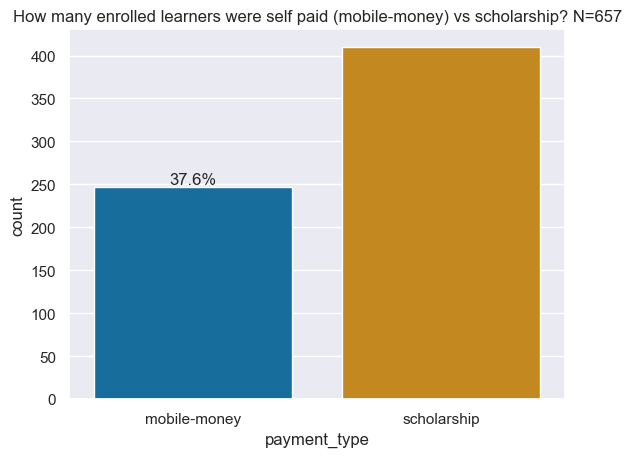

In [192]:
#Visualize payment difference
ax = sns.countplot(x='payment_type', data=learner_payments, palette='colorblind',
)
ax.set(
    title="How many enrolled learners were self paid (mobile-money) vs scholarship? N={}".format(learner_payments["user_id"].nunique())
)

# get the total count of the type column
total = learner_payments['payment_type'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

# Feature Engineering
The following features are of interest for this analysis:
- Explanatory Variables (Measures of Participation)
    - num_practice_questions_during_broadcast = total number of unique lesson questions attempted for the first time during radio broadcast time (11:15 a.m - 11:45 am UTC)
    - num_practice_questions_before-after_broadcast = total number of unique lesson questions attempted for the first time outside radio broadcast time 
- Outcomes (Measures of Learning)
    - num_correct_test_questions = total number of test questions done correctly on first attempt throughout the course
    - num_correct_exam_questions = total number of final exam questions done correctly on first attempt

Why do I specify the "first time" for measures of participation? - This system is held together with digital ductape and a dream so we have discovered bugs that may enable users to access questions, when they are not supposed to access them.

## Extract Info from Key

In [193]:
def get_step(keys):
    # step questions follow this regex pattern
    step_pattern = r"((?<=step-)\d{1,2}|baseline|intro-step|endline|course-menu|exam-questions)"
    step_column = keys.str.extract(step_pattern)
    return step_column

def get_lesson_number(keys):
    lesson_pattern = r"(?<=lesson-)([\d{1,2}])"
    lesson_column = keys.str.extract(lesson_pattern)
    return lesson_column

def get_question_number(keys):
    question_pattern = r"(?<=q)([\d{1,2}])"
    question_column = keys.str.extract(question_pattern)
    return question_column

def expand_question_keys(df):
    #Label step, lesson, and question
    df["step_num"] = get_step(df["key"])
    df["lesson_num"] = get_lesson_number(df["key"])
    df["question_num"] = get_question_number(df["key"])
    return df

def add_course_id_to_responses(responses, registrations):
    #Limit to course ids in broadcast info
    registrations = registrations[registrations["course_id"].isin(COURSE_INFO.keys())]
    #print(registrations.sample(random_state=1))

    #Return responses with course_ids
    return pd.merge(left=responses, right=registrations[["user_id", "course_id"]], on="user_id", how="inner")


In [194]:
#Check on duplicate registrations
course_3_registrations = registration_df[(registration_df["course_id"] == 4) | (registration_df["course_id"] == 5)]
course_3_registrations_dup = course_3_registrations[course_3_registrations.duplicated(subset=["user_id", "course_id"])]
print("User_ids", course_3_registrations_dup["user_id"].unique())

User_ids []


In [195]:
# Expanding Keys to label steps, lessons, and question numbers
learner_responses_expanded = expand_question_keys(learner_responses)
#drop non step questions
#lira_responses_to_assessments = lira_responses_to_assessments.dropna
learner_responses_expanded.sample(3, random_state=3)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
id,,,,,,,,,,
1304159,2022-10-03 15:53:43,2022-10-03 15:53:43,7618,2590628,airscience-2022a/course/baseline-survey#question-6-bodas-are-going-too-fast-lesson-objectives-baseline-survey-objectives-md-problem-solving-process,I make a plan and advise the local leadership,0,baseline,NaN,NaN
1383521,2022-10-25 17:08:47,2022-10-25 17:08:47,55395,2737596,airscience-2022a/course/step-4-plan/step-4-lesson-1/go-to-questions#q2-these-are-basic-components-of-a-pedal-powered-washing-machine-except,Electrical switch,1,4,1,2
1441668,2022-11-09 09:26:12,2022-11-09 09:26:12,12539,2837776,airscience-2022a/course/step-5-create/step-5-lesson-4/go-to-questions#q1-what-part-inside-a-washing-machine-helps-to-increase-friction-while-washing,Agitator,1,5,4,1


In [196]:
# Add course ids to responses
learner_responses_expanded =  add_course_id_to_responses(responses=learner_responses_expanded, registrations=registration_df)
learner_responses_expanded.sample(2, random_state=1)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num,course_id
9974,2022-09-11 17:01:46,2022-09-11 17:01:46,11013,2319722,tech-team-static/static-pages/my-course,Back to menu,0,NaN,NaN,NaN,4
187383,2022-10-29 16:37:25,2022-10-29 16:37:25,58931,2759039,airscience-2022a/course/step-4-plan/step-4-lesson-1/go-to-questions#q3-where-are-clothes-placed-and-where-is-water-put-in-a-washing-machine,"Clothes in the inner drum, water in outer drum",1,4,1,3,5


## How many questions of each type are there?

### Practice Questions

In [197]:
# Define the conditions
is_lesson_question = learner_responses_expanded['key'].str.contains('airscience-2022a/course/.*/go-to-question')
is_not_did_you_listen = ~learner_responses_expanded['key'].str.contains('airscience-2022a/course/.*/go-to-questions#did-you-listen-to-the-radio-lesson-before-doing-these-questions')

# Apply the conditions to filter the DataFrame
learner_responses_to_practice_questions = learner_responses_expanded[is_lesson_question & is_not_did_you_listen]
#Save lesson keys
lesson_keys = learner_responses_to_practice_questions["key"].unique()
print("unique lesson questions", learner_responses_to_practice_questions["key"].nunique())

unique lesson questions 83


### Test Questions

In [198]:
# Define the conditions
key_starts_with_test = learner_responses_expanded['key'].str.startswith('airscience-2022a/course/tests')
not_step_9_test = ~learner_responses_expanded['key'].str.startswith('airscience-2022a/course/tests/step-9-test')
not_step_10_test = ~learner_responses_expanded['key'].str.startswith('airscience-2022a/course/tests/step-10-test')

# Combine the conditions using bitwise operators
combined_condition = key_starts_with_test & not_step_9_test & not_step_10_test

# Apply the combined condition to filter the DataFrame
learner_responses_to_tests = learner_responses_expanded[combined_condition]

#Save test keys
test_keys = learner_responses_to_tests["key"].unique()
print("unique lesson questions answered by learner sample: ", learner_responses_to_tests["key"].nunique())

unique lesson questions answered by learner sample:  56


### Counts by Gitbook

In [199]:
#Counts by gitbook

#According to gitbook step tests from intro to step 8 had the following number of tests
print(8 + 6 + 5 + 6 + 6 + 7 + 6 + 5 + 7, "test questions in gitbook")

56 test questions in gitbook


## Define Functions for Feature Engineering

In [200]:
"""
- Explanatory Variables (Measures of Participation)
    - num_practice_questions_during_broadcast = total number of unique lesson questions attempted for the first time during radio broadcast time (11:15 a.m - 11:45 am UTC)
    - num_practice_questions_before-after_broadcast = total number of unique lesson questions attempted for the first time outside radio broadcast time 
- Outcomes (Measures of Learning)
    - num_correct_test_questions = total number of test questions done correctly on first attempt throughout the course
    - num_correct_exam_questions = total number of final exam questions done correctly on first attempt
"""

def count_practice_questions_first_attempts_during_broadcast(single_user_responses_df):

    #Get relevant broadcast info for user
    user_course_id = single_user_responses_df["course_id"].iloc[0]
    broadcast_start = COURSE_INFO[user_course_id]["BROADCAST_START"]
    broadcast_end = COURSE_INFO[user_course_id]["BROADCAST_END"]

    #include only lesson questions
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response]

    # Keep only first responses
    single_user_responses_df = single_user_responses_df.drop_duplicates(subset="key", keep="first")

    #Remove Sunday responses (no broadcast on Sunday)
    is_Sunday = single_user_responses_df["created"].dt.day_name() == "Sunday"
    non_Sunday_responses = single_user_responses_df.loc[~is_Sunday].set_index("created")

    #get responses during broadcast (between 11:15 and 11:45)
    responses_during_broadcast = non_Sunday_responses.between_time(start_time=broadcast_start, end_time=broadcast_end, inclusive="both")

    #Get count
    responses_during_broadcast_count = len(responses_during_broadcast)
    return responses_during_broadcast_count
    
def count_practice_questions_first_attempts_outside_broadcast(single_user_responses_df):
    #Get relevant broadcast info for user
    user_course_id = single_user_responses_df["course_id"].iloc[0]
    broadcast_start = COURSE_INFO[user_course_id]["BROADCAST_START"]
    broadcast_end = COURSE_INFO[user_course_id]["BROADCAST_END"]

    #include only lesson questions
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response]

    # sort by created time
    single_user_responses_df = single_user_responses_df.sort_values(by="created")

    # Keep only first responses
    single_user_responses_df = single_user_responses_df.drop_duplicates(subset="key", keep="first")

    # Set created time as index
    single_user_responses_df = single_user_responses_df.set_index("created")

    #get responses before and after broadcast (outside BROADCAST_Start and BROADCAST_END), 
    responses_before_after_broadcast = single_user_responses_df.between_time(start_time=broadcast_end, end_time=broadcast_start, inclusive="neither")

    #Get count
    count_responses_before_after_broadcast = len(responses_before_after_broadcast)
    return count_responses_before_after_broadcast

def count_user_practice_unique_questions_attempted(single_user_responses_df):
    """Calculates the number of unique lesson questions completed by a single user over the entire course

    Args:
        single_user_responses_df (dataframe): dataframe of responses from a single user

    Returns:
        int: number of unique lesson questions done
    """
    #drop non lesson question responses
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    user_lesson_responses = single_user_responses_df.loc[is_lesson_response]

    #Only keep first attempts
    user_lesson_responses = user_lesson_responses.drop_duplicates(subset="key", keep="first")

    #return number of unique lesson keys responded to
    return user_lesson_responses["key"].nunique()

def count_user_practice_questions_total_attempts(single_user_responses_df):
    """Calculates the number of unique lesson questions completed by a single user over the entire course

    Args:
        single_user_responses_df (dataframe): dataframe of responses from a single user

    Returns:
        int: number of unique lesson questions done
    """
    #drop non lesson question responses
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    user_lesson_responses = single_user_responses_df.loc[is_lesson_response]

    #return number of unique lesson keys responded to
    return user_lesson_responses["key"].count()

def count_correct_first_attempts_on_test_questions(single_user_responses_df):
    #include only test questions
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    user_test_responses = single_user_responses_df.loc[is_test_response]

    # sort by created time
    single_user_responses_df = single_user_responses_df.sort_values(by="created")

    # Keep only first attempt at each question
    user_test_responses = user_test_responses.drop_duplicates(subset = ["key"], keep="first")

    # Sum correct responses
    count_of_correct_on_first_attempt = user_test_responses["correct"].sum()

    return count_of_correct_on_first_attempt

def count_correct_first_attempts_on_exam_questions(single_user_responses_df):

    # Get relevant info for user
    user_course_id = single_user_responses_df["course_id"].iloc[0]
    exam_pattern = COURSE_INFO[user_course_id]["EXAM_KEY_PATTERN"]

    # keep only exam keys
    is_exam_response = single_user_responses_df['key'].str.match(exam_pattern)
    user_exam_responses = single_user_responses_df.loc[is_exam_response]

    # sort by created time
    user_exam_responses = user_exam_responses.sort_values(by="created")

    # Keep only first attempt at each question
    user_exam_responses = user_exam_responses.drop_duplicates(subset = ["key"], keep="first")

    # Sum correct responses
    count_of_correct_on_first_attempt = user_exam_responses["correct"].sum()

    return count_of_correct_on_first_attempt

def calc_exam_question_first_attempt_success_rate(single_user_responses_df):

    # Get relevant info for user
    user_course_id = single_user_responses_df["course_id"].iloc[0]
    exam_pattern = COURSE_INFO[user_course_id]["EXAM_KEY_PATTERN"]

    # keep only exam keys
    is_exam_response = single_user_responses_df['key'].str.match(exam_pattern)
    user_exam_responses = single_user_responses_df.loc[is_exam_response]

    # sort by created time
    user_exam_responses = user_exam_responses.sort_values(by="created")

    # Keep only first attempt at each question
    user_exam_responses = user_exam_responses.drop_duplicates(subset = ["key"], keep="first")

    # correct/atttempted
    first_attempt_success_rate = user_exam_responses["correct"].sum() / len (user_exam_responses)

    return first_attempt_success_rate

def  calc_test_question_first_attempt_success_rate(single_user_responses_df):
    #include only test questions
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    user_test_responses = single_user_responses_df.loc[is_test_response]

    # sort by created time
    single_user_responses_df = single_user_responses_df.sort_values(by="created")

    # Keep only first attempt at each question
    user_test_responses = user_test_responses.drop_duplicates(subset = ["key"], keep="first")

     # correct/atttempted
    first_attempt_success_rate = user_test_responses["correct"].sum() / len (user_test_responses)

    return first_attempt_success_rate

def label_user_with_certificate_and_prototype(learner_outcomes):
    #certificate of innovation learners
    cert_of_innovation_users = pd.read_csv("/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_feature_use/course3_certified_users.csv")
    return learner_outcomes.index.isin(cert_of_innovation_users["User ID"]).astype("int")

def label_course_id(single_user_responses_df):
    # Get relevant info for user
    user_course_id = single_user_responses_df["course_id"].iloc[0]
    return user_course_id

def is_course_id_5_lira(single_user_responses_df):
    user_course_id = single_user_responses_df["course_id"].iloc[0]

    if user_course_id == 5:
        return 1
    else:
        return 0

## Combine Features

In [201]:
# Initialize table
learner_outcomes = pd.DataFrame()

# Group responses by user
learner_responses_expanded_user_grouped = learner_responses_expanded.groupby("user_id")

In [202]:
## Explanatory Variables

pract_quest_first_att_dur_broad = "pqfa_db"
learner_outcomes[pract_quest_first_att_dur_broad] = \
    learner_responses_expanded_user_grouped.apply(count_practice_questions_first_attempts_during_broadcast)

p_quest_first_att_out_broad = "pqfa_ob"
learner_outcomes[p_quest_first_att_out_broad] = \
    learner_responses_expanded_user_grouped.apply(count_practice_questions_first_attempts_outside_broadcast)

unique_pract_quest_att = "upqa"
learner_outcomes[unique_pract_quest_att] = \
    learner_responses_expanded_user_grouped.apply(count_user_practice_unique_questions_attempted)

total_pract_quest_att = "tpqa"
learner_outcomes[total_pract_quest_att] = \
    learner_responses_expanded_user_grouped.apply(count_user_practice_questions_total_attempts)

is_lira = "is_lira"
learner_outcomes[is_lira] = learner_responses_expanded_user_grouped.apply(is_course_id_5_lira)

learner_outcomes["course_id"] = learner_responses_expanded_user_grouped.apply(label_course_id)



###### Quant Outcomes



test_quest_corr_fa = "tqc_fa"
learner_outcomes[test_quest_corr_fa] = pd.Series(learner_responses_expanded_user_grouped.apply(count_correct_first_attempts_on_test_questions))

exam_quest_corr_fa = "eqc_fa" #first attempt
learner_outcomes[exam_quest_corr_fa] = \
    pd.Series(learner_responses_expanded_user_grouped.apply(count_correct_first_attempts_on_exam_questions))

exam_quest_fa_succ_rate = "eqc_fa_sr" #first attempt
learner_outcomes[exam_quest_fa_succ_rate] = \
    pd.Series(learner_responses_expanded_user_grouped.apply(calc_exam_question_first_attempt_success_rate))

test_quest_fa_succ_rate = "tq_fa_sr"
learner_outcomes[test_quest_fa_succ_rate] = \
    pd.Series(learner_responses_expanded_user_grouped.apply(calc_test_question_first_attempt_success_rate))

#test question first attempt success rate
learner_outcomes["course_id"] = learner_responses_expanded_user_grouped.apply(label_course_id)


### Cat Outcomes
# Certificate acheivement
received_cert = "rc"
learner_outcomes[received_cert] = label_user_with_certificate_and_prototype(learner_outcomes=learner_outcomes)


learner_outcomes.describe(include="all")


/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T/ipykernel_19460/4191722314.py:150: RuntimeWarning: invalid value encountered in scalar divide
  first_attempt_success_rate = user_exam_responses["correct"].sum() / len (user_exam_responses)
/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T/ipykernel_19460/4191722314.py:166: RuntimeWarning: invalid value encountered in scalar divide
  first_attempt_success_rate = user_test_responses["correct"].sum() / len (user_test_responses)


,pqfa_db,pqfa_ob,upqa,tpqa,is_lira,course_id,tqc_fa,eqc_fa,eqc_fa_sr,tq_fa_sr,rc
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,331.000000,526.000000,657.000000
mean,4.041096,41.050228,45.173516,104.951294,0.625571,4.625571,21.716895,5.424658,0.728792,0.664892,0.153729
std,7.256399,30.438346,33.112249,94.163846,0.484344,0.484344,18.294064,5.702551,0.159555,0.192478,0.360964
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,11.000000,22.000000,0.000000,4.000000,3.000000,0.000000,0.666667,0.553571,0.000000
50%,0.000000,40.000000,44.000000,92.000000,1.000000,5.000000,20.000000,0.000000,0.733333,0.675444,0.000000
75%,5.000000,74.000000,81.000000,160.000000,1.000000,5.000000,39.000000,11.000000,0.833333,0.803571,0.000000
max,52.000000,83.000000,83.000000,648.000000,1.000000,5.000000,56.000000,15.000000,1.000000,1.000000,1.000000


In [203]:
learner_outcomes.describe(include="all").round(2).to_csv("/Users/ddbutler/repos_new/yiya_data_analysis/data/processed/learner_outcome_describe.csv")

In [204]:
print(learner_outcomes.columns[0:5])
print("")

Index(['pqfa_db', 'pqfa_ob', 'upqa', 'tpqa', 'is_lira'], dtype='object')



In [205]:
print(learner_outcomes.columns)

Index(['pqfa_db', 'pqfa_ob', 'upqa', 'tpqa', 'is_lira', 'course_id', 'tqc_fa',
       'eqc_fa', 'eqc_fa_sr', 'tq_fa_sr', 'rc'],
      dtype='object')


In [206]:
explanatory_vars = list(learner_outcomes.columns[0:5])

hue = 'course_id'

quant_outcome_vars = list(['tqc_fa',
       'eqc_fa', 'eqc_fa_sr', 'tq_fa_sr'])

cat_outcome_vars = ['rc']

Comment on the average and the distributions. If time allows, create a boxplot to highlight distribution. 

In [207]:
learner_outcomes.sample(3)

,pqfa_db,pqfa_ob,upqa,tpqa,is_lira,course_id,tqc_fa,eqc_fa,eqc_fa_sr,tq_fa_sr,rc
user_id,,,,,,,,,,,
14789,0,10,10,23,1,5,0,0,NaN,NaN,0
68668,4,79,83,256,1,5,37,10,0.666667,0.660714,0
58302,12,38,50,159,0,4,14,12,0.800000,0.608696,0


## Replace Mssing with 0

In [208]:
learner_outcomes.fillna(0).describe()

,pqfa_db,pqfa_ob,upqa,tpqa,is_lira,course_id,tqc_fa,eqc_fa,eqc_fa_sr,tq_fa_sr,rc
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,4.041096,41.050228,45.173516,104.951294,0.625571,4.625571,21.716895,5.424658,0.367169,0.532319,0.153729
std,7.256399,30.438346,33.112249,94.163846,0.484344,0.484344,18.294064,5.702551,0.381819,0.316747,0.360964
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,11.000000,22.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.363636,0.000000
50%,0.000000,40.000000,44.000000,92.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.620000,0.000000
75%,5.000000,74.000000,81.000000,160.000000,1.000000,5.000000,39.000000,11.000000,0.733333,0.767857,0.000000
max,52.000000,83.000000,83.000000,648.000000,1.000000,5.000000,56.000000,15.000000,1.000000,1.000000,1.000000


In [209]:
learner_outcomes = learner_outcomes.fillna(0)

# Visualize

In [210]:
registration_df["user_id"].nunique()

28629

## Pairplot Visualization of Relationships

In [211]:
# import pandas as pd
# import numpy as np    
# import seaborn as sns
# import matplotlib.pyplot as plt

# iris = sns.load_dataset("iris")

# g = sns.PairGrid(learner_outcomes, hue="course_id", x_vars=explanatory_vars,
#     y_vars=quant_outcome_vars)
# g = g.map(plt.scatter)

# xlabels,ylabels = [],[]

# for ax in g.axes[-1,:]:
#     xlabel = ax.xaxis.get_label_text()
#     xlabels.append(xlabel)
# for ax in g.axes[:,0]:
#     ylabel = ax.yaxis.get_label_text()
#     ylabels.append(ylabel)

# for i in range(len(xlabels)):
#     for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

# plt.show()

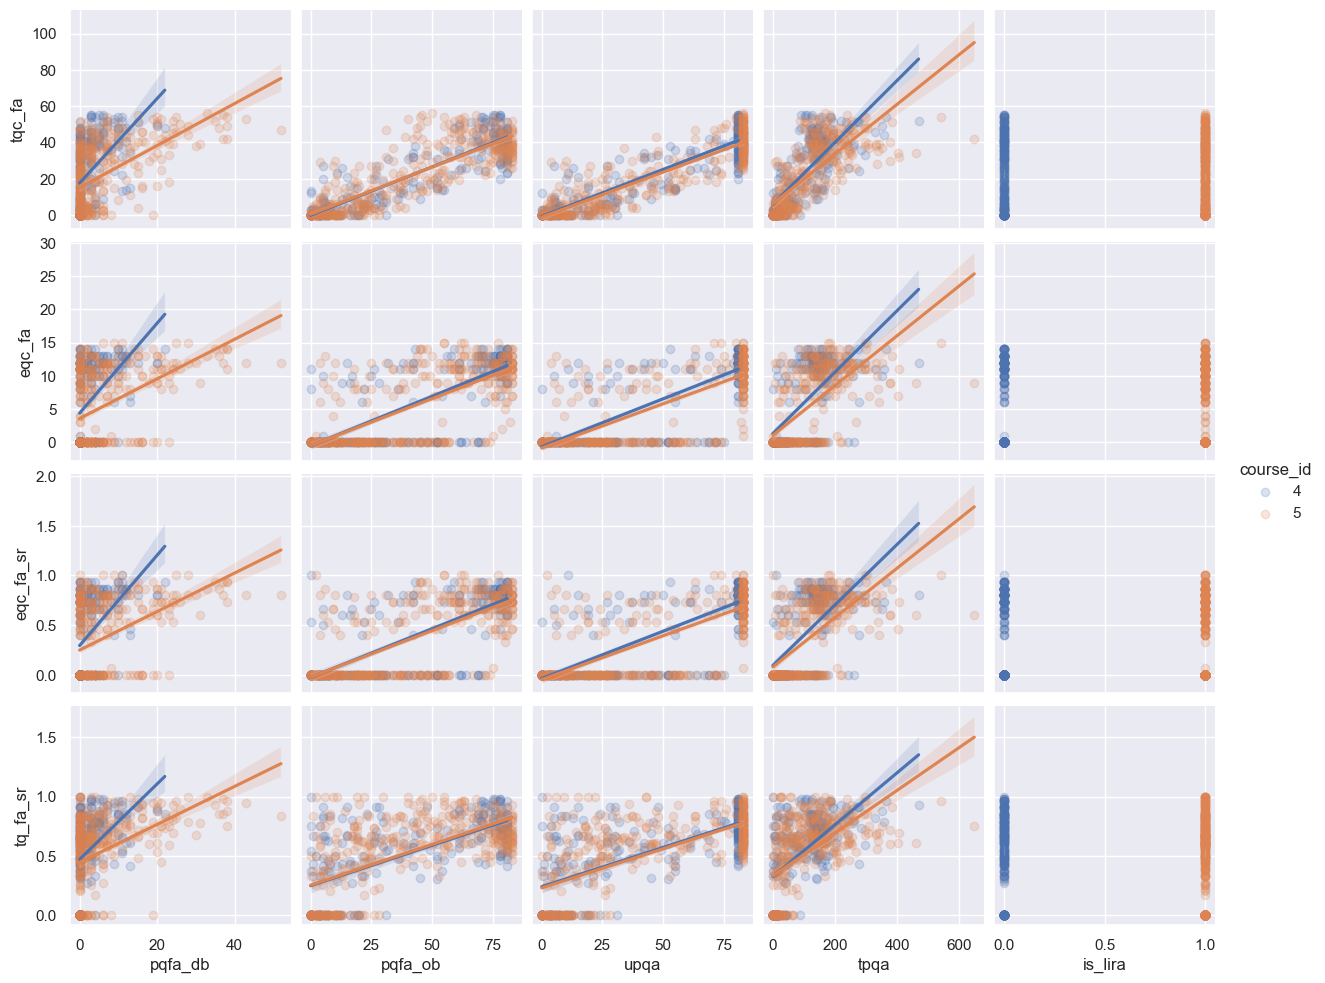

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

sns.pairplot(
    data=learner_outcomes, kind="reg", 
    x_vars=explanatory_vars,
    y_vars=quant_outcome_vars,
    hue=hue,
    plot_kws={'scatter_kws': {'alpha': 0.2}},
    dropna=True
)

#sns.set(font_scale=0.5)

# sns.pairplot(
#     data=learner_outcomes, kind="reg", 
#     vars=explanatory_vars + ['test_quest_corr', 'exam_quest_corr'],
#     dropna=True
# )
plt.show()

## Time Distribution of first attempts

In [213]:
learner_responses_expanded["time_of_day"] = learner_responses_expanded["created"].dt.time
learner_responses_expanded["hour_of_day"] = learner_responses_expanded["created"].dt.hour

In [214]:
learner_responses_expanded.sample(2)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num,course_id,time_of_day,hour_of_day
77638,2022-11-08 17:33:35,2022-11-08 17:33:35,32449,2834886,airscience-2022a/course/step-1-identify/step-1-lesson-4/go-to-questions#how-do-scientists-analyze-data,by drawing Pie charts and graphs,1,1,4,NaN,4,17:33:35,17
165802,2022-11-07 11:51:12,2022-11-07 11:51:12,63699,2821612,airscience-2022a/course/tests/step-5-test#q2-why-should-the-agitator-be-metallic,All the above,1,5,NaN,2,4,11:51:12,11


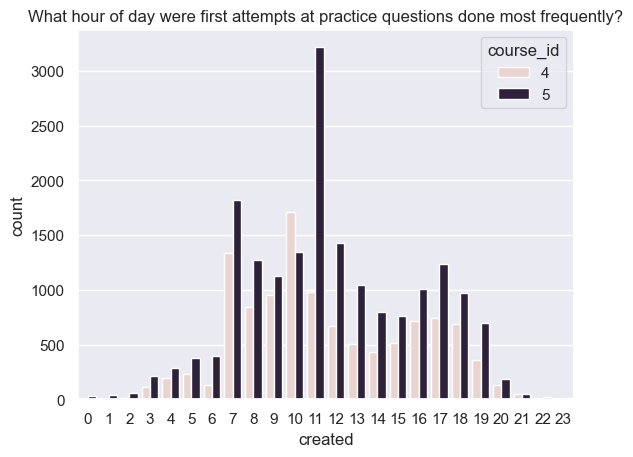

In [215]:
def visualize_first_attempts(single_user_responses_df):
    #include only lesson questions
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response]

    # sort by created time
    single_user_responses_df = single_user_responses_df.sort_values(by="created")

    # Keep only first responses
    single_user_responses_df = single_user_responses_df.drop_duplicates(subset=["key","user_id"], keep="first")

    #vis
    ax = sns.countplot(data=single_user_responses_df, x=single_user_responses_df["created"].dt.hour, hue="course_id")
    ax.set(
        title="What hour of day were first attempts at practice questions done most frequently?"
    )
    plt.show()

visualize_first_attempts(single_user_responses_df=learner_responses_expanded)


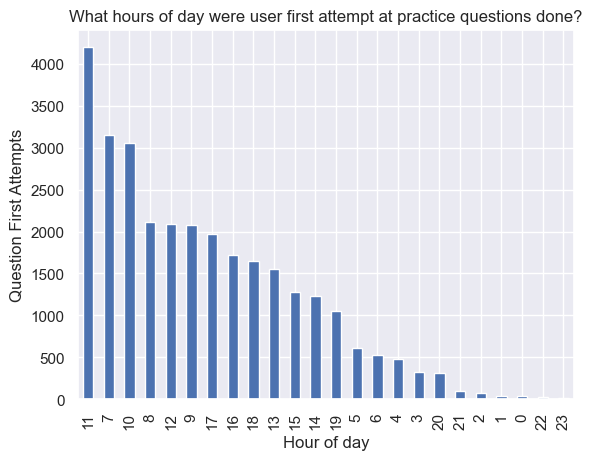

11    4197
7     3154
10    3058
8     2112
12    2092
Name: created, dtype: int64


In [216]:
def vis_created_dist(single_user_responses_df):
    #include only lesson questions
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response]

    # sort by created time
    single_user_responses_df = single_user_responses_df.sort_values(by="created")

    # Keep only first responses
    single_user_responses_df = single_user_responses_df.drop_duplicates(subset=["key","user_id"], keep="first")

    #Visualize distirbution

    import matplotlib.pyplot as plt
    #distribution of times
    #response_features["created"].dt.time
    single_user_responses_df["created"].dt.hour.value_counts().plot.bar()

    plt.title("What hours of day were user first attempt at practice questions done?")
    #plt.title("What hours of the day were responses sent?")
    plt.xlabel("Hour of day")
    plt.ylabel("Question First Attempts")
    plt.show()
    print(single_user_responses_df["created"].dt.hour.value_counts().nlargest(5))

vis_created_dist(learner_responses_expanded)

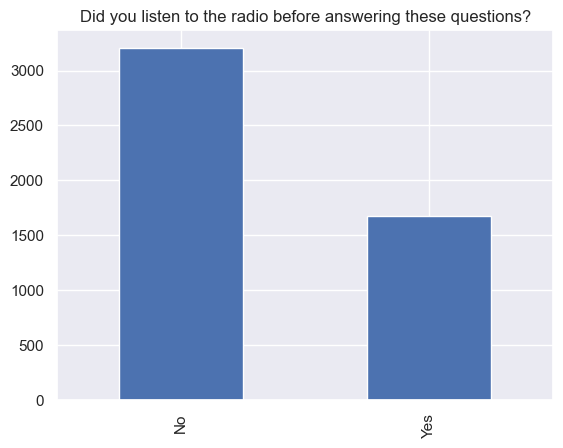

Times students were polled 16


In [217]:
listening_survey = learner_responses.loc[learner_responses["key"].str.contains("did-you-listen-to-the-radio")]
listening_survey = listening_survey.drop_duplicates(subset=["user_id", "key"], keep="last")
listening_survey["value"].value_counts().plot.bar()
plt.title("Did you listen to the radio before answering these questions?")
plt.show()

print("Times students were polled",listening_survey["key"].nunique())


# Multiple Regression Analysis

## Normalize

Normalizing with z score allows for coeefiicients to be more interperable because everything is scaled in terms of effect size.

In [218]:
explanatory_vars 

['pqfa_db', 'pqfa_ob', 'upqa', 'tpqa', 'is_lira']

In [219]:
## Normalize
import scipy.stats as stats

learner_outcomes[explanatory_vars + quant_outcome_vars] = stats.zscore(learner_outcomes[explanatory_vars + quant_outcome_vars])


In [220]:
learner_outcomes.describe()

,pqfa_db,pqfa_ob,upqa,tpqa,is_lira,course_id,tqc_fa,eqc_fa,eqc_fa_sr,tq_fa_sr,rc
count,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,657.000000,657.000000,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,657.000000
mean,7.570471e-17,-4.325983e-17,5.407479e-17,2.162992e-17,0.000000,4.625571,7.638064e-17,-6.488975e-17,-1.081496e-17,-6.488975e-17,0.153729
std,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762,0.484344,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,0.360964
min,-5.573253e-01,-1.349663e+00,-1.365293e+00,-1.115410e+00,-1.292568,4.000000,-1.188005e+00,-9.519934e-01,-9.623646e-01,-1.681861e+00,0.000000
25%,-5.573253e-01,-1.020880e+00,-1.032837e+00,-8.815963e-01,-1.292568,4.000000,-1.023893e+00,-9.519934e-01,-9.623646e-01,-5.329516e-01,0.000000
50%,-5.573253e-01,-3.452975e-02,-3.546754e-02,-1.376448e-01,0.773654,5.000000,-9.392134e-02,-9.519934e-01,-9.623646e-01,2.770293e-01,0.000000
75%,1.322467e-01,1.083333e+00,1.082795e+00,5.850510e-01,0.773654,5.000000,9.454582e-01,9.784376e-01,9.597303e-01,7.441840e-01,0.000000
max,6.614224e+00,1.379238e+00,1.143242e+00,5.771456e+00,0.773654,5.000000,1.875429e+00,1.680413e+00,1.658674e+00,1.477639e+00,1.000000


## Correlate

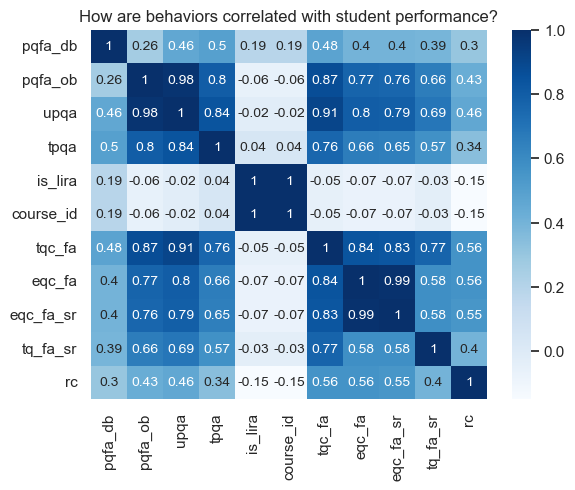

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

corr = learner_outcomes.corr()

plt.title("How are behaviors correlated with student performance?")

sns.heatmap(corr.round(2), cmap="Blues", annot=True, annot_kws={"fontsize":10})

plt.show()

## FINAL OLS Regresssions

In [222]:
quant_outcome_vars

['tqc_fa', 'eqc_fa', 'eqc_fa_sr', 'tq_fa_sr']

In [223]:
for outcome in quant_outcome_vars:
    print(outcome)

tqc_fa
eqc_fa
eqc_fa_sr
tq_fa_sr


In [224]:
import statsmodels.api as sm

models = []

for outcome in quant_outcome_vars:
    print(outcome)
    #define response variable
    y = learner_outcomes[outcome]

    #define predictor variables
    x = learner_outcomes[explanatory_vars]

    #add constant to predictor variables
    x = sm.add_constant(x)



    #fit linear regression model
    model = sm.OLS(y, x).fit()
    models.append(model)

    #view model summary
    #print(model.summary())

tqc_fa
eqc_fa
eqc_fa_sr
tq_fa_sr


In [225]:
print(models[0].summary())

                            OLS Regression Results                            
Dep. Variable:                 tqc_fa   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     689.2
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.19e-257
Time:                        18:44:56   Log-Likelihood:                -327.98
No. Observations:                 657   AIC:                             668.0
Df Residuals:                     651   BIC:                             694.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.94e-17      0.016    3.8e-15      1.0

In [226]:
print(models[1].summary())

                            OLS Regression Results                            
Dep. Variable:                 eqc_fa   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     235.1
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.26e-143
Time:                        18:44:56   Log-Likelihood:                -593.32
No. Observations:                 657   AIC:                             1199.
Df Residuals:                     651   BIC:                             1226.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.369e-17      0.023  -5.85e-16      1.0

In [227]:
print(models[2].summary())

                            OLS Regression Results                            
Dep. Variable:              eqc_fa_sr   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          7.89e-137
Time:                        18:44:56   Log-Likelihood:                -608.19
No. Observations:                 657   AIC:                             1228.
Df Residuals:                     651   BIC:                             1255.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.665e-17      0.024   -3.2e-15      1.0

In [228]:
print(models[3].summary())

                            OLS Regression Results                            
Dep. Variable:               tq_fa_sr   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     124.1
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.70e-92
Time:                        18:44:56   Log-Likelihood:                -712.38
No. Observations:                 657   AIC:                             1437.
Df Residuals:                     651   BIC:                             1464.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.995e-17      0.028  -2.14e-15      1.0

## Final Log Regression for Receive Cert

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#define the predictor variables and the response variable
X = learner_outcomes[explanatory_vars]
y = learner_outcomes["rc"]

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [230]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[157,  12],
       [ 12,  17]])

In [231]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788


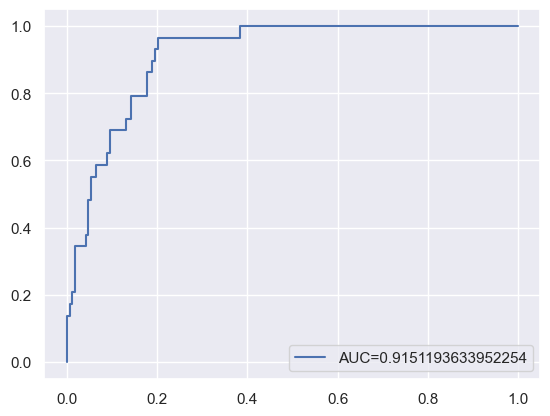

In [232]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [233]:
print("feature names", log_regression.feature_names_in_)
print("log_regression.coef_", log_regression.coef_)

feature names ['pqfa_db' 'pqfa_ob' 'upqa' 'tpqa' 'is_lira']
log_regression.coef_ [[ 0.71575123  1.7221705   1.29913704 -0.12472611 -0.76029425]]


In [173]:
#name folder
processed_data_folder = "/Users/ddbutler/repos_new/yiya_data_analysis/data/processed/"

#export resposnespkl
# learner_responses_expanded.to_pickle(processed_data_folder + "course_3_responses_paid_users.pkl")

#export responses csv
#learner_responses_expanded.to_csv(processed_data_folder + "course_3_responses_paid_users.csv")

#export learner outcomes
learner_outcomes.to_csv(processed_data_folder + "course_3_outcomes_paid_users.csv")

# Run Above this Cell

### Interpretation (TBU)

TODO: Update Interpretation


## Assumption Checking (TBU)

Below, every assumption is passed except the Normality assumption.

#### Linearity 

####  Independence of residuals

Durbin-Watson: 1.834

Linear regression assumes no correlation between residuals. The Durbin Watson test is used to measure autocorellation between residuals. The test statistic is between 0 and 4. A test stat of 2 indicates no serial correlation. Values between   1.5 and 2.5 are considered normal. Anything outside, indicates a problem with autocorelation. 

Here, the Durbin-Watson is 1.834. Thus, autocorrelation is not a problem and the residuals are independent of each other 

#### Equal Variance 

The Lagrange multiplier statistic for the test is 6.003 and the corresponding p-value is 0.1114. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that unequal variance is present in the regression model.

#### Normality

The p value for the Jarque-Bera test of normality is less than 0.05 for both predictor variables so we **do not have a normal distribution**.

#### Multicollinearity 

Check this assumption by calculating the VIF value of each predictor variable.

We can observe the VIF values for each of the explanatory variables above. VIF values start at 1 and have no upper limit. A value between 1 and 5 indicates moderate correlation between a given exploratory variable and other explanatory variables, but this is not severe enough to require attention. 

Multicoloinareairty between explanatory variables is not a problem. 



# Conclusion of Multiple Linear Regression

What matters is just doing more questions.

In [155]:
#export data
#lira_learner_outcomes.to_csv("/Users/ddbutler/repos_new/yiya_data_analysis/data/processed/lira_learner_outcomes.csv")

# Former Analysis

In [156]:
#TODO:
#cal_user_resposes_during_broadcast(learner_responses_expanded)

6680

In [157]:
#group respones from lira to users
learner_responses_expanded_user_grouped = learner_responses_expanded.groupby("user_id")

### Combine Features

In [158]:
#create dataframe with features
learner_outcomes = pd.DataFrame()
learner_outcomes

""


In [159]:
learner_outcomes["lesson_questions"] = learner_responses_expanded_user_grouped.apply(count_unique_practice_questions_done)

In [160]:
learner_outcomes["correct_test_questions"] = learner_responses_expanded_user_grouped.apply(calc_user_correct_test_questions)

In [161]:
learner_outcomes["responses_during_broadcast"] = learner_responses_expanded_user_grouped.apply(cal_user_resposes_during_broadcast)

In [162]:
learner_outcomes.sample(4)

,lesson_questions,correct_test_questions,responses_during_broadcast
user_id,,,
58711,22,3,5
46104,20,5,0
53255,98,35,25
24325,7,0,0


In [163]:
learner_outcomes.describe()

,lesson_questions,correct_test_questions,responses_during_broadcast
count,411.000000,411.000000,411.000000
mean,51.493917,26.031630,16.253041
std,39.484320,22.281053,28.817241
min,0.000000,0.000000,0.000000
25%,11.000000,3.500000,0.000000
50%,44.000000,23.000000,3.000000
75%,98.000000,46.500000,20.000000
max,102.000000,68.000000,236.000000


There is a strange outlier with the number of responses sent during broadcast. 

## Descriptive Visualizations 

## Time Distribution of Pure Responses

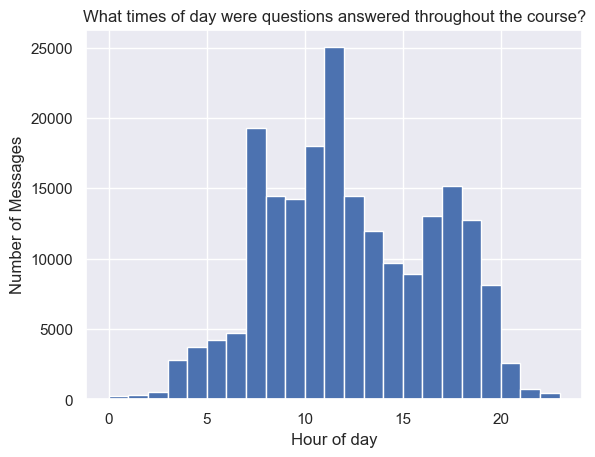

In [176]:
import matplotlib.pyplot as plt
#distribution of times
#response_features["created"].dt.time
learner_responses_expanded["created"].dt.hour.hist(bins=23)
plt.title("What times of day were questions answered throughout the course?")
#plt.title("What hours of the day were responses sent?")
plt.xlabel("Hour of day")
plt.ylabel("Number of Messages")
plt.show()

### Time Distribtuion of First Qustion Attempts

In [165]:
def visualize_created_distribution(df):

    import matplotlib.pyplot as plt
    #distribution of times
    #response_features["created"].dt.time
    learner_responses_expanded["created"].dt.hour.hist(bins=23)
    plt.title("What times of day were questions answered throughout the course?")
    #plt.title("What hours of the day were responses sent?")
    plt.xlabel("Hour of day")
    plt.ylabel("Number of Messages")
    plt.show()

learner_responses_expanded



,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
id,,,,,,,,,,
1143164,2022-08-15 16:09:49,2022-08-15 16:09:49,22945,2297542,course-menu,My Course,0,course-menu,NaN,NaN
1143295,2022-08-17 06:43:57,2022-08-17 06:43:57,22945,2297789,course-menu,My Profile,0,course-menu,NaN,NaN
1143296,2022-08-17 06:44:04,2022-08-17 06:44:04,22945,2297790,tech-team-static/static-pages/my-profile,Update my profile,0,NaN,NaN,NaN
1143297,2022-08-17 06:44:15,2022-08-17 06:44:15,22945,2297791,tech-team-static/static-pages/update-profile,More Items,0,NaN,NaN,NaN
1143298,2022-08-17 06:44:35,2022-08-17 06:44:35,22945,2297792,tech-team-static/static-pages/update-profile-cont,previous items,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1565099,2022-12-28 13:53:59,2022-12-28 13:53:59,7751,3036630,tech-team-static/static-pages/my-course,Previous Lessons,0,NaN,NaN,NaN
1565102,2022-12-28 13:54:34,2022-12-28 13:54:34,7751,3036636,airscience-2022a/course/step-8-launch/step-8-lesson-3/go-to-questions#q1-how-do-you-calculate-the-price-of-one-product,Total cost of materials + Labour + profit,1,8,3,1
1565104,2022-12-28 13:54:45,2022-12-28 13:54:45,7751,3036638,airscience-2022a/course/step-8-launch/step-8-lesson-3/go-to-questions#q2-what-do-you-need-to-start-a-business-of-making-and-selling-locally-made-washing-machines,Enough fully made samples,1,8,3,2


What percentage of messages are algined with broadcast? What's percentage of messages were sent between "start_time="11:15", end_time="11:45")"

In [166]:
len(learner_responses_expanded)

127593

In [177]:

print("Messages Sent during Hours of Day (24HR)")
print(learner_responses_expanded["created"].dt.hour.value_counts())

Messages Sent during Hours of Day (24HR)
11    25021
7     19280
10    18006
17    15188
8     14480
12    14439
9     14244
16    13005
18    12712
13    11987
14     9651
15     8936
19     8114
6      4725
5      4212
4      3710
3      2816
20     2550
21      735
2       519
1       326
22      276
0       253
23      192
Name: created, dtype: int64


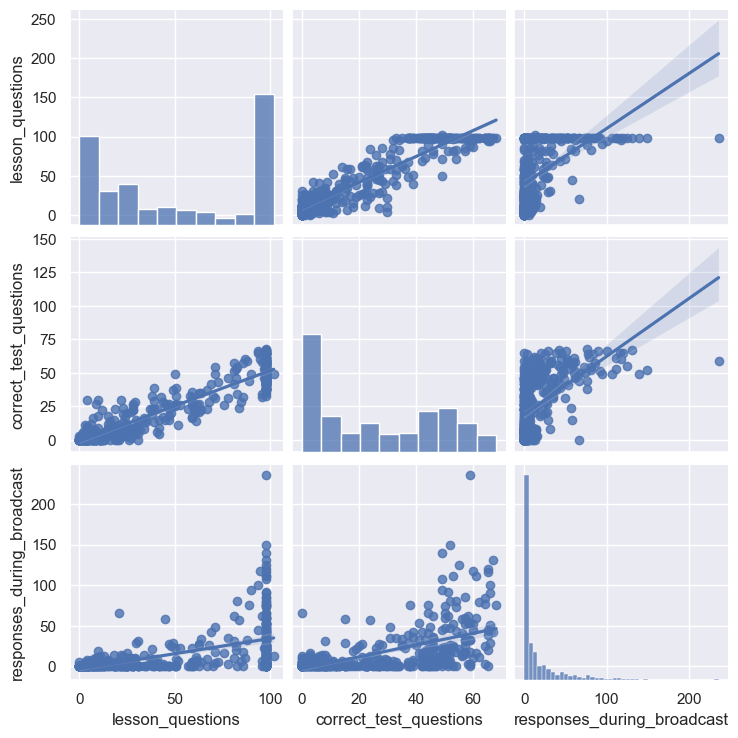

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

sns.pairplot(data=learner_outcomes, kind="reg")
plt.show()

## Active Users Over Time

Enrolled Users:   657


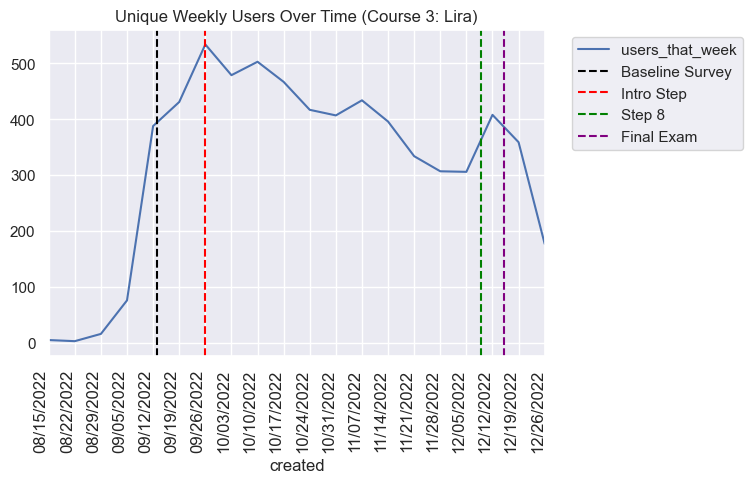

created
2022-08-15      5
2022-08-22      3
2022-08-29     16
2022-09-05     76
2022-09-12    388
2022-09-19    431
2022-09-26    534
2022-10-03    479
2022-10-10    503
2022-10-17    467
2022-10-24    417
2022-10-31    407
2022-11-07    434
2022-11-14    396
2022-11-21    334
2022-11-28    307
2022-12-05    306
2022-12-12    408
2022-12-19    359
2022-12-26    177
Freq: 7D, Name: user_id, dtype: int64

In [179]:
import matplotlib.dates as mdates

def show_unique_users_over_time(df):
    print("Enrolled Users:  ", df["user_id"].nunique())
    weekly_resample = df.resample("7D", on="created")

    plt.title("Unique Weekly Users Over Time (Course 3: Lira)")

    weekly_resample["user_id"].nunique().plot(label="users_that_week")
    #weekly_resample["user_id"].size().plot()

    #EVENT Lines
    #Baseline Survey
    plt.axvline(x = "09/13/2022", color = 'black', linestyle ="--", label = 'Baseline Survey')
    #into step
    plt.axvline(x = "09/26/2022", color = 'red', linestyle ="--", label = 'Intro Step')
    #label exam start
    plt.axvline(x = "12/09/2022", color = 'green', linestyle ="--", label = 'Step 8')
    #label exam start
    plt.axvline(x = "12/15/2022", color = 'purple', linestyle ="--", label = 'Final Exam')

    #Format dates on x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.gcf().autofmt_xdate()
    plt.xticks(fontsize=12, rotation=90)

    #Format Legend
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #show plot
    plt.show() 

    #Show Raw Data
    display(weekly_resample["user_id"].nunique())

show_unique_users_over_time(learner_responses_expanded)

## Correlation Analysis

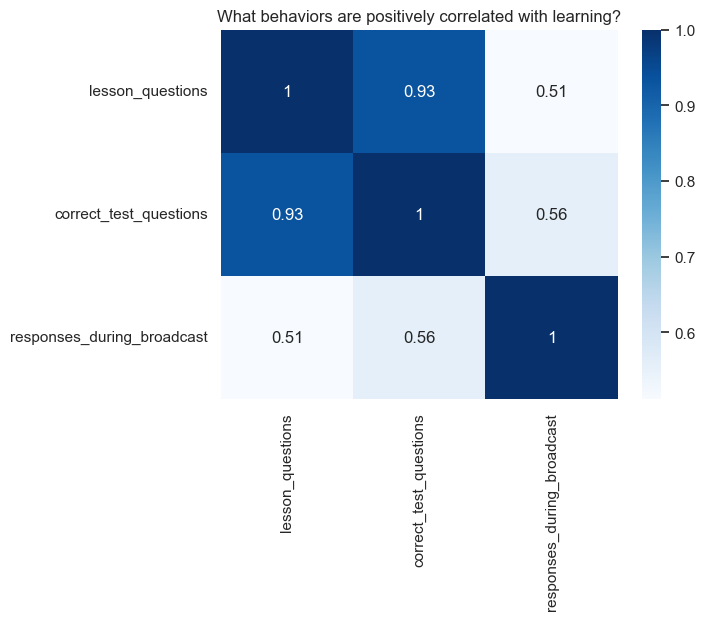

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

corr = learner_outcomes.corr()

plt.title("What behaviors are positively correlated with learning?")

sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions.

## Regression Analysis

The Regression analysis below shows that the coefficient for responses_during broadcast. The R squared value  (0.45) indicates that there responses during broadcast is moderately correlated with correct test questions. 



In [171]:
import statsmodels.api as sm

y = learner_outcomes["correct_test_questions"] #outcome
X = learner_outcomes["responses_during_broadcast"]  #explanatory variable
mod = sm.OLS(y, X) 
res = mod.fit()
print(res.summary())

                                   OLS Regression Results                                  
Dep. Variable:     correct_test_questions   R-squared (uncentered):                   0.476
Model:                                OLS   Adj. R-squared (uncentered):              0.475
Method:                     Least Squares   F-statistic:                              372.5
Date:                    Thu, 05 Oct 2023   Prob (F-statistic):                    1.64e-59
Time:                            20:02:52   Log-Likelihood:                         -1902.7
No. Observations:                     411   AIC:                                      3807.
Df Residuals:                         410   BIC:                                      3811.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.0

To help with interpretation, z score ID and DD. For each STDEV, 
Normalize with Z scores. 

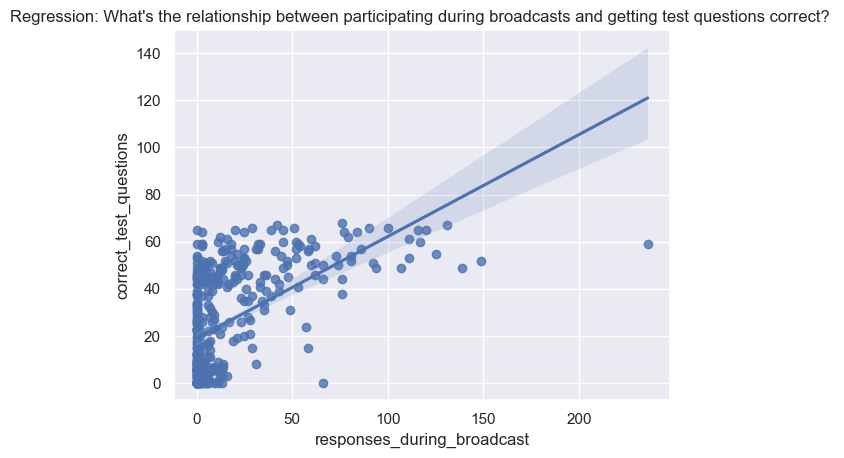

In [172]:
#Create Regression Plot of responses during broadcast vs correct test questions
sns.regplot(data=learner_outcomes, x=X, y=y)
plt.title("Regression: What's the relationship between participating during broadcasts and getting test questions correct? ")
plt.show()

In [173]:
#certified
cert_of_innovation_users = pd.read_csv("/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_feature_use/course3_certified_users.csv")
cert_of_innovation_users.sample(4, random_state=1)

,User ID
94,61555
78,32993
17,35139
100,39079


## Innovation Certificate Regression

This regression might be trash. I'm not sure how to interpret regressions with categorical outcomes. The negative coefficient is contradicting the correlation by negatively associating number of broadcast messages with building a prototype. 

In [174]:
#certificate of innovation learners
cert_of_innovation_users = pd.read_csv("/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_feature_use/course3_certified_users.csv")
cert_of_innovation_users.sample(4, random_state=1)
learner_outcomes["received_innovation_cert"] =  learner_outcomes.index.isin(cert_of_innovation_users["User ID"]).astype("int")
print("Lira users that received cert of innovation: ", learner_outcomes["received_innovation_cert"].sum())

learner_outcomes.sample(3)

Lira users that received cert of innovation:  46


,lesson_questions,correct_test_questions,responses_during_broadcast,received_innovation_cert
user_id,,,,
63580,2,3,0,0
59272,98,57,25,1
60097,21,11,0,0


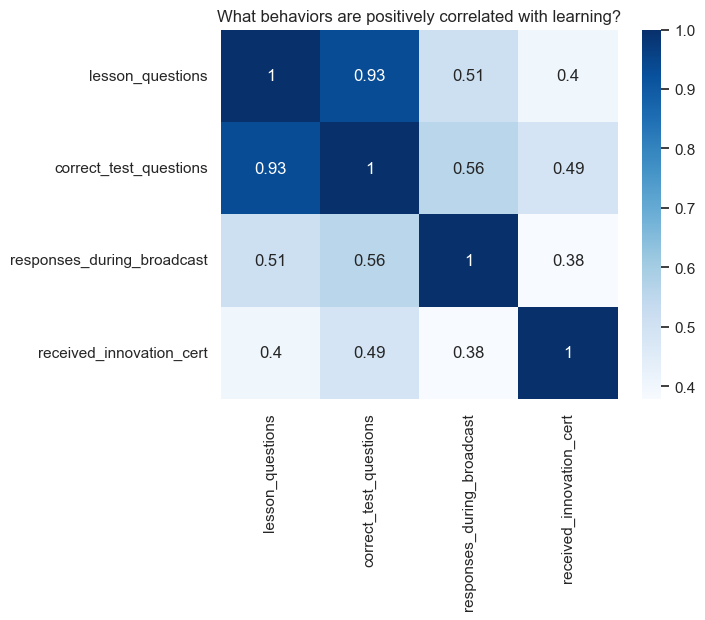

In [175]:
#Regression of broadcast activity and innovation cert

plt.title("What behaviors are positively correlated with learning?")
corr = learner_outcomes.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [176]:
#Multiple Logistic Regression
y = learner_outcomes["received_innovation_cert"] 
X = learner_outcomes["correct_test_questions"]
mod = sm.Logit(y, X) 
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.612342
         Iterations 5
                              Logit Regression Results                              
Dep. Variable:     received_innovation_cert   No. Observations:                  411
Model:                                Logit   Df Residuals:                      410
Method:                                 MLE   Df Model:                            0
Date:                      Thu, 05 Oct 2023   Pseudo R-squ.:                 -0.7470
Time:                              20:02:52   Log-Likelihood:                -251.67
converged:                             True   LL-Null:                       -144.06
Covariance Type:                  nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
correct_test_questions    -0.0260   

## Export Data

## Summary

Most messages for learners registered with the Lira course were sent near the broadcast times. There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions. However, there is a strong positive correlation between unique lesson questions attempted and test performance. This may suggest:
- Answering lesson questions without listening to the radio may be sufficient to perform well in tests
- Some learners may listen to broadcasts first to understand concepts and answer questions later

Limitations
- At time of analysis, the keys for the final exam in course 3 are unclear so it was not included. 

Future Work
- The next analysis will use num_practice_questions_during and num_practice_questions_beforeafter as analysis. 

# Code Tests

In [179]:
test_data = pd.DataFrame(
    {"created": ["2022-11-26T11:15:52.000", "2022-11-15T14:15:59.000", "2022-11-26T11:15:52.000"],
     "key": ["airscience-2022a/course/step-2-investigate/step-2-lesson-3/go-to-questions#q3-why-did-the-stick-pencil-inserted-in-the-bottle-of-rice-stones-lift-up-the-bottle",
             "yiya-airscience-tests-2021/take-step-1-test#q1",
             "yiya-airscience-tests-2021/take-step-1-test#q1"]}
    )

test_data["created"] = pd.to_datetime(test_data["created"]) 
#test_data
print(test_data["created"].dt.day_name())
print(cal_user_resposes_during_broadcast(test_data))


0    Saturday
1     Tuesday
2    Saturday
Name: created, dtype: object
1
